In [1]:
import numpy as np
import math

In [2]:
def get_Fs(F, u, v):
    FRows, FCols = F.shape
    Fs = 1.0
    for i in range(FCols):
        Fs *= math.exp(-1 * F[u, i] * F[v, i])
    return Fs

In [3]:
def log_likelihood(F, A):
    FRows, FCols = F.shape
    ARows, ACols = A.shape
    log_likelihood = 0
    for u in range(ARows):
        for v in range(ACols):
            if(u == v):
                continue
            Fs = get_Fs(F, u, v)
            a = A[u, v]
            log_likelihood += math.log(a + Fs - 2 * a * Fs)
    return log_likelihood

In [4]:
def by_rond_F_k(F, A, u, k):
    rond_F_k = float(0)
    FRows, FCols = F.shape
    ARows, ACols = A.shape
    for v in range(ACols):
        if(u == v):
            continue
        Fs = get_Fs(F, u, v)
        a = A[u, v]
        rond_F_k += (2*a - 1) * F[v, k] * Fs / (a + Fs - 2 * a * Fs)
    rond_F_k *= 2
    return rond_F_k

def gradient(F, A, u):
    gradient = []
    FRows, FCols = F.shape
    for k in range(FCols):
        gradient.append(by_rond_F_k(F, A, u, k))
    return np.array(gradient)

In [5]:
def train(A, C, iterations = 200):
    # initialize an F
    N = A.shape[0]
    F = np.random.rand(N,C)

    for n in range(iterations):
        for person in range(N):
            grad = gradient(F, A, person)
            F[person] += 0.005*grad # updating F
            F[person] = np.maximum(0.001, F[person]) # F should be nonnegative
            ll = log_likelihood(F, A)
            print('At step %4i logliklihood is %5.4f'%(n,ll))

    return F

#### Test with 40 people with two 25 groups

In [6]:
A=np.random.rand(40,40)

A[0:15,0:25]=A[0:15,0:25]>1- 0.6 # connection prob people with 1 common group
A[0:15,25:40]=A[0:15,25:40]>1-0.1 # connection prob people with no common group
A[15:40,25:40]=A[15:40,25:40]>1-0.7 # connection prob people with 1 common group
A[15:25,15:25]=A[15:25,15:25]>1-0.8 # connection prob people with 2 common group
for i in range(40):
    A[i,i]=0
    for j in range(i):
        A[i,j]=A[j,i]

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

At step    0 logliklihood is -1468.0524
At step    0 logliklihood is -1467.6725
At step    0 logliklihood is -1441.9378
At step    0 logliklihood is -1434.0554
At step    0 logliklihood is -1431.9659
At step    0 logliklihood is -1430.4553
At step    0 logliklihood is -1418.4310
At step    0 logliklihood is -1418.3258
At step    0 logliklihood is -1404.6244
At step    0 logliklihood is -1404.5842
At step    0 logliklihood is -1403.7720
At step    0 logliklihood is -1377.9503
At step    0 logliklihood is -1377.1781
At step    0 logliklihood is -1377.0619
At step    0 logliklihood is -1371.4939
At step    0 logliklihood is -1309.1880
At step    0 logliklihood is -1309.0117
At step    0 logliklihood is -1295.0348
At step    0 logliklihood is -1267.4601
At step    0 logliklihood is -1251.9414
At step    0 logliklihood is -1248.5834
At step    0 logliklihood is -1245.7493
At step    0 logliklihood is -1225.0663
At step    0 logliklihood is -1224.6617
At step    0 logliklihood is -1138.3840


AttributeError: module 'networkx' has no attribute 'from_numpy_matrix'

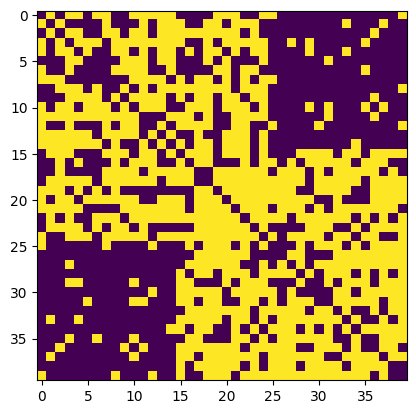

In [8]:
plt.imshow(A)
delta=np.sqrt(-np.log(1-0.1)) # epsilon=0.1
F=train(A, 2, iterations = 120)
print(F>delta)
G=nx.from_numpy_matrix(A)
C=F>delta # groups members
nx.draw(G,node_color=10*(C[:,0])+20*(C[:,1]))

همانطور که می‌بینیم، ماتریس مجاورت شامل دو بلوک است که در بخش‌های قبل توصیف کردیم